In [94]:
import sys
sys.path.append("./../..")

In [95]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [110]:

#
import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as T
import numpy as np
#
from effcn.models_mnist import CapsNet, CapsNetCross,EffCapsNetCross, EffCapsNet
from misc.utils import count_parameters, calc_receptive_field, layer_conv, bb_pc_vals, calc_layer_combs, rf_layer_combs
from misc.plot_utils import imshow, plot_mat

### Local Func

In [97]:
def show_imgrid(x,y,nrow=8):

    print(y.view(-1,nrow))

    img = torchvision.utils.make_grid(x[:64,:1,:,:], nrow=nrow)
    img = img.permute((1,2,0))
    plt.imshow(img)
    plt.show()


### Load Dataset

In [98]:
p_data = '/mnt/data/datasets'

In [99]:
ds = datasets.MNIST(root=p_data, train=False,download=False, transform=T.ToTensor())

In [100]:
bs = 32
shuffle=False
dl = torch.utils.data.DataLoader(ds,batch_size=bs,shuffle=shuffle)

In [101]:
x, y = next(iter(dl))

tensor([[7, 2, 1, 0, 4, 1, 4, 9],
        [5, 9, 0, 6, 9, 0, 1, 5],
        [9, 7, 3, 4, 9, 6, 6, 5],
        [4, 0, 7, 4, 0, 1, 3, 1]])


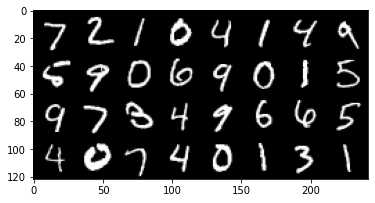

In [102]:
show_imgrid(x,y,nrow=8)

### Load Model

In [103]:
p_model = '/mnt/data/experiments/CN/mnist/mnist_CapsNet_2022_05_17_13_28_17/ckpts/model_150.ckpt'

In [104]:
CN = CapsNet()
CN.load_state_dict(torch.load(p_model))
CN.eval()

CapsNet(
  (backbone): BackboneHinton(
    (layers): Sequential(
      (0): Conv2d(1, 256, kernel_size=(9, 9), stride=(1, 1))
      (1): ReLU(inplace=True)
    )
  )
  (primcaps): PrimaryCapsLayer(
    (conv): Conv2d(256, 256, kernel_size=(9, 9), stride=(2, 2), padding=valid)
    (squash): SquashHinton()
  )
  (digitcaps): CapsLayer(
    (routing_module): AgreementRouting(
      (squash): SquashHinton()
    )
  )
  (decoder): Decoder(
    (layers): Sequential(
      (0): Linear(in_features=160, out_features=512, bias=True)
      (1): ReLU(inplace=True)
      (2): Linear(in_features=512, out_features=1024, bias=True)
      (3): ReLU(inplace=True)
      (4): Linear(in_features=1024, out_features=784, bias=True)
      (5): Sigmoid()
    )
  )
)

In [105]:
y_pred, x_reg = CN(x)

print(y_pred.shape, x_reg.shape)

torch.Size([32, 10, 16]) torch.Size([32, 1, 28, 28])


tensor([[7, 2, 1, 0, 4, 1, 4, 9],
        [5, 9, 0, 6, 9, 0, 1, 5],
        [9, 7, 3, 4, 9, 6, 6, 5],
        [4, 0, 7, 4, 0, 1, 3, 1]])


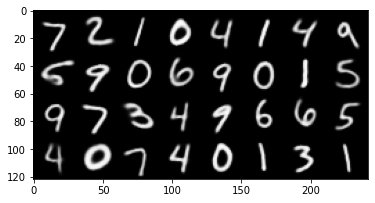

In [106]:
show_imgrid(x_reg,y,nrow=8)

In [108]:
u_h, x_rec, u_l, bb = CN.forward_pc_study(x)

print('Backbone Shape:       {}'.format(bb.shape))
print('PrimeCaps Shape:      {}'.format(u_l.shape))
print('ClassCaps Shape:      {}'.format(u_h.shape))
print('Reconstruction Shape: {}'.format(x_rec.shape))

Backbone Shape:       torch.Size([32, 256, 20, 20])
PrimeCaps Shape:      torch.Size([32, 1152, 8])
ClassCaps Shape:      torch.Size([32, 10, 16])
Reconstruction Shape: torch.Size([32, 1, 28, 28])


In [111]:
u_l[0].shape

plot_mat(u_l)

ValueError: too many values to unpack (expected 2)